In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in all our data
#tmt = pd.read_csv("Datasets/Treatment_Follow_Up.csv", dtype={'when_child_died': str, 'where_child_died': str}) #, low_memory=False)
pt = pd.read_csv("Datasets/Patient-Table.csv")
#ref = pd.read_csv("Datasets/Referral_Follow_Up-table.csv")
followup = pd.read_csv("Datasets/Follow_Up_Consolidated.csv")

C:\Users\sudha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pt_case = pd.read_csv("Datasets/Patient_Case-Table.csv")

In [4]:
pt_case.describe()

,count_treatment_follow_ups,count_referral_follow_ups
count,55400.000000,55400.000000
mean,0.425289,0.244964
std,0.903159,0.430070
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4.000000,1.000000


In [5]:
pt_case.head()

,case_id,patient_id,chw_id,how_child_found,when_assessed,when_assessed_en,when_illness_began,when_illness_began_en,count_treatment_follow_ups,count_referral_follow_ups,...,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,malaria_without_24h_follow_up,malaria_without_48h_follow_up,malaria_without_72h_follow_up,muac_yellow_no_malnutrition_follow_up,pneumonia_without_amoxicillin,severe_diarrhea_without_referral,symptoms_of_malaria_without_tdr
0,9156B9BD-08CD-59D4-AEB6-9887D79E9CDC,EF6C2A92-B163-FA63-80D4-AE13EDE7A34E,16259fcc-d057-4874-8638-2f89d3ff2f20,home_visit,c_assessment_time_1,Morning,c_when_illness_1,Today,0,0,...,False,False,False,True,True,True,False,False,False,False
1,000264B5-5124-9A3E-9038-EADF76D3DFA5,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,c27a0584-b106-469e-b0b7-538b72fd1bb4,home_visit,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,1,...,False,False,False,False,False,False,False,False,False,False
2,A8A160CF-A715-749C-B757-81B5EAD40A3F,bf2e3fc5-418c-4bf9-8905-c342306ae64b,a4119d4c-664e-49cf-a596-aa25981ebf8d,home_visit,c_assessment_time_1,Morning,c_when_illness_8,More than three days ago,0,0,...,False,True,False,False,False,False,False,False,False,False
3,98A68B40-2578-C932-93EB-94DE2735F9BB,7d77152b-5063-4f68-9df8-86cb0b2b2f88,5ba0b402-23c3-405b-90d1-bc776c212e54,home_visit,c_assessment_time_1,Morning,c_when_illness_4,Yesterday morning,1,0,...,False,False,True,False,True,True,False,False,False,False
4,FCC07669-E440-A159-902D-08EF013AF9DC,450425BF-BAD1-CEBE-A6EA-8283FB765047,fda753c1c37ef32fba0138a4c7c33958,home_visit,c_assessment_time_1,Morning,c_when_illness_1,Today,0,0,...,False,False,False,False,False,False,False,False,False,False


In [6]:
pt_case['when_illness_began'].value_counts()
pt_case['when_illness_began_en'].value_counts()

Today                                  12544
Last night                             11426
More than three days ago                9367
Yesterday evening                       6263
Three days ago                          5991
Yesterday morning                       4675
Evening of the day before yesterday     3133
Morning of the day before yesterday     2001
Name: when_illness_began_en, dtype: int64

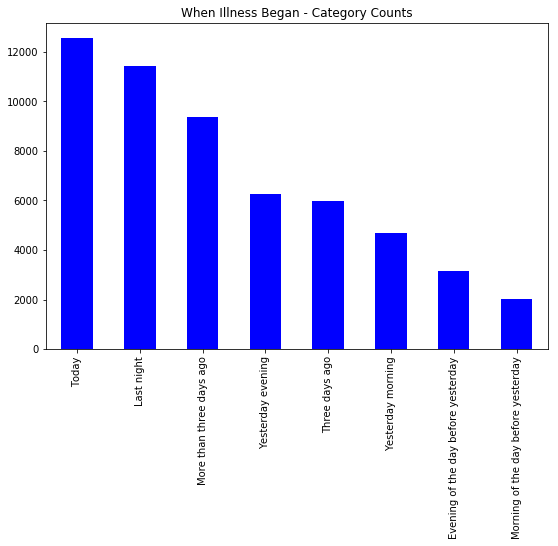

In [7]:
pt_case['when_illness_began_en'].value_counts().plot(kind='bar', 
                                                     rot=90, 
                                                     title = 'When Illness Began - Category Counts',
                                                     figsize=(9, 6),
                                                     color='b')

In [8]:
pt_case.columns

Index(['case_id', 'patient_id', 'chw_id', 'how_child_found', 'when_assessed',
       'when_assessed_en', 'when_illness_began', 'when_illness_began_en',
       'count_treatment_follow_ups', 'count_referral_follow_ups', 'treat_ari',
       'treat_malaria', 'treat_diarrhea', 'accompany_to_cscom',
       'refer_to_cscom', 'has_protocol_errors',
       'act_based_combination_without_positive_tdr',
       'acute_respiratory_infection_without_24h_follow_up',
       'acute_respiratory_infection_without_48h_follow_up',
       'acute_respiratory_infection_without_5_day_follow_up',
       'amoxicillin_without_pneumonia', 'danger_signs_without_referral',
       'diarrhea_without_5day_follow_up', 'diarrhea_without_ors',
       'diarrhea_without_zinc', 'fever_without_tdr',
       'incorrect_dosage_of_act_based_combination',
       'incorrect_dosage_of_albendazole', 'incorrect_dosage_of_amoxicillin',
       'incorrect_dosage_of_paracetamol', 'incorrect_dosage_of_vitamin_a',
       'incorrect_dosage_o

In [9]:
pt_case['treat_ari'].value_counts()

False    44870
True     10530
Name: treat_ari, dtype: int64

In [10]:
protocol_errors = pt_case.groupby('has_protocol_errors', as_index=False).agg({'treat_ari':'sum', 'treat_malaria':'sum', 'treat_diarrhea':'sum'})

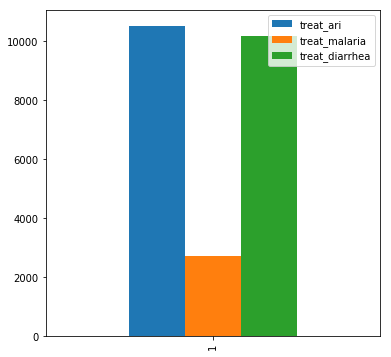

In [11]:
protocol_errors[protocol_errors['has_protocol_errors']==True].plot(kind='bar', figsize=(6,6))

In [15]:
pt_case[(pt_case.has_protocol_errors==True) & (pt_case.treat_malaria==True)]['malaria_without_24h_follow_up'].value_counts() #plot(kind='bar', figsize=(6,6))

False    1769
True      963
Name: malaria_without_24h_follow_up, dtype: int64

In [16]:
pt_case[(pt_case.has_protocol_errors==True) & (pt_case.treat_malaria==True)]['malaria_without_48h_follow_up'].value_counts()

True     2478
False     254
Name: malaria_without_48h_follow_up, dtype: int64

In [17]:
pt_case[(pt_case.has_protocol_errors==True) & (pt_case.treat_malaria==True)]['malaria_without_72h_follow_up'].value_counts()

True     2638
False      94
Name: malaria_without_72h_follow_up, dtype: int64

In [18]:
col = ['treat_ari',
       #'treat_malaria', 'treat_diarrhea', 
       #'accompany_to_cscom',
       #'refer_to_cscom', 'has_protocol_errors',
       #'act_based_combination_without_positive_tdr',
       'acute_respiratory_infection_without_24h_follow_up',
       'acute_respiratory_infection_without_48h_follow_up',
       'acute_respiratory_infection_without_5_day_follow_up',
       'amoxicillin_without_pneumonia', 'danger_signs_without_referral',
       #'diarrhea_without_5day_follow_up', 'diarrhea_without_ors',
       #'diarrhea_without_zinc', 'fever_without_tdr',
       'incorrect_dosage_of_act_based_combination',
       'incorrect_dosage_of_albendazole', 'incorrect_dosage_of_amoxicillin',
       'incorrect_dosage_of_paracetamol', 'incorrect_dosage_of_vitamin_a',
       'incorrect_dosage_of_zinc', 
       #'malaria_without_24h_follow_up',
       #'malaria_without_48h_follow_up', 'malaria_without_72h_follow_up',
       #'muac_yellow_no_malnutrition_follow_up',
       'pneumonia_without_amoxicillin']
       #'severe_diarrhea_without_referral',
       #'symptoms_of_malaria_without_tdr']
sub = pt_case[col]

In [19]:
sub[sub['treat_ari'] == True].apply(pd.Series.value_counts)

,treat_ari,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,pneumonia_without_amoxicillin
False,NaN,5159,1200,572,10530.0,10530.0,9934,10349,9867,10353,10458,8948,10231
True,10530.0,5371,9330,9958,NaN,NaN,596,181,663,177,72,1582,299


In [20]:
sub.apply(pd.Series.value_counts)  #.plot(kind='bar')

,treat_ari,acute_respiratory_infection_without_24h_follow_up,acute_respiratory_infection_without_48h_follow_up,acute_respiratory_infection_without_5_day_follow_up,amoxicillin_without_pneumonia,danger_signs_without_referral,incorrect_dosage_of_act_based_combination,incorrect_dosage_of_albendazole,incorrect_dosage_of_amoxicillin,incorrect_dosage_of_paracetamol,incorrect_dosage_of_vitamin_a,incorrect_dosage_of_zinc,pneumonia_without_amoxicillin
False,44870,50029,46070,45442,55400.0,52331,51148,54478,54737,54453,55000,46235,55101
True,10530,5371,9330,9958,NaN,3069,4252,922,663,947,400,9165,299


In [22]:
followup.head()

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1,16BAE18F-EE00-F97E-9E63-59165099F8A2,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,2017-09-25 22:36:03.615+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1,99C84433-5C20-F545-B55F-5A9383A59567,16259fcc-d057-4874-8638-2f89d3ff2f20,dbc49be5-d79f-4a01-a97a-fbee9e2af68e,255D4EEE-CE48-8196-B07C-7BB9D9E6D470,2017-10-06 17:49:08.757+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,1,101C254E-BDBD-880E-B3C8-E1EE4916C321,fda753c1c37ef32fba0138a4c7c0b6b4,2ed86979-5eba-45e4-b826-e63efed9c6a9,46FFCF88-1EC0-D460-A17C-D01DC860B0FD,2017-09-26 22:19:52.278+00,no_change,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [23]:
followup.describe()

,event_number,tfu_under_observation,tfu_child_temperature,tfu_child_temperature_retake,tfu_respiration_rate,tfu_follow_up_count
count,67194.000000,0.0,25230.000000,408.000000,17228.000000,25235.000000
mean,1.965771,NaN,36.841505,37.105392,40.561412,2.029364
std,1.345351,NaN,1.089153,6.693605,10.127263,1.129543
min,1.000000,NaN,0.500000,0.000000,0.000000,1.000000
25%,1.000000,NaN,36.500000,35.000000,37.000000,1.000000
50%,2.000000,NaN,36.900000,36.000000,40.000000,2.000000
75%,3.000000,NaN,37.200000,37.000000,45.000000,3.000000
max,51.000000,NaN,50.500000,50.000000,635.000000,4.000000


In [24]:
print(pt['sex'].value_counts())

Femme         49382
Homme         47599
femme         45524
homme         29421
2                 9
1                 9
Fils/Fille        3
Name: sex, dtype: int64


In [25]:
followup.count()

case_id                         67194
event_type                      67194
event_number                    67194
event_id                        67194
chw_id                          67194
chw_parent_id                   67194
patient_id                      67194
reported                        67194
how_disease_progressing         61573
new_danger_sign                 61089
close_out                       67194
why_close_out                    4964
when_child_died                   110
where_child_died                  115
tfu_task_to_perform             25235
tfu_treat_for_diarrhea          25234
tfu_treat_for_malaria           25235
tfu_treat_for_ari               25234
tfu_under_observation               0
tfu_child_temperature           25230
tfu_child_temperature_retake      408
tfu_respiration_rate            17228
tfu_child_taking_act             4062
tfu_child_morning_act            4004
tfu_child_evening_act            4004
tfu_act_not_given                  58
tfu_child_ta

In [26]:
print("Follow-up-type: \n", followup['tfu_follow_up_type'].value_counts())
print("\nEvent-type: \n", followup['event_type'].value_counts())
print("\nDisease Progress: \n", followup['how_disease_progressing'].value_counts())
followup.head()

Follow-up-type: 
 ari         14633
referral     6776
malaria      2889
multiple      937
Name: tfu_follow_up_type, dtype: int64

Event-type: 
 referral     41959
treatment    25235
Name: event_type, dtype: int64

Disease Progress: 
 improved      39919
cured         20799
no_change       671
aggravated      184
Name: how_disease_progressing, dtype: int64


,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1,16BAE18F-EE00-F97E-9E63-59165099F8A2,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,2017-09-25 22:36:03.615+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1,99C84433-5C20-F545-B55F-5A9383A59567,16259fcc-d057-4874-8638-2f89d3ff2f20,dbc49be5-d79f-4a01-a97a-fbee9e2af68e,255D4EEE-CE48-8196-B07C-7BB9D9E6D470,2017-10-06 17:49:08.757+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,1,101C254E-BDBD-880E-B3C8-E1EE4916C321,fda753c1c37ef32fba0138a4c7c0b6b4,2ed86979-5eba-45e4-b826-e63efed9c6a9,46FFCF88-1EC0-D460-A17C-D01DC860B0FD,2017-09-26 22:19:52.278+00,no_change,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [27]:
#followup.reset_index(inplace=True)
#followup.set_index('how_disease_progressing', inplace=True)
followup.groupby('how_disease_progressing').count()  #.agg({'case_id': 'count', 'event_type': 'count', 'event_number':'count'})

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,new_danger_sign,close_out,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
how_disease_progressing,,,,,,,,,,,,,,,,,,,,,
aggravated,184,184,184,184,184,184,184,184,0,184,...,0,55,5,1,0,1,0,92,92,92
cured,20799,20799,20799,20799,20799,20799,20799,20799,20799,20799,...,8,4640,46,64,1,64,2,8325,8325,12474
improved,39919,39919,39919,39919,39919,39919,39919,39919,39919,39919,...,49,11935,107,75,1,75,2,15849,15849,24070
no_change,671,671,671,671,671,671,671,671,371,671,...,1,135,12,8,1,8,1,225,225,446


In [28]:
#followup.reset_index(inplace=True)
followup.head()

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
0,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,1,0082AC03-2A2A-866D-9302-528D81810D73,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-03 17:07:27.662+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1,00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2,236022FB-250D-84F0-9C1E-77C0ED6D6968,c437cf4c-d7d6-4758-b115-3285e87bd5b3,ef3f5c74-6983-499c-9e1b-1c4215ba3665,e086609c-6dcd-4b86-b8cc-23833f5fd825,2017-10-04 15:22:42.808+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2,000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1,16BAE18F-EE00-F97E-9E63-59165099F8A2,c27a0584-b106-469e-b0b7-538b72fd1bb4,0beaced5-f358-4412-a644-5c9d67b2df23,6D15493C-1DDF-FEAE-9377-9F35F2D5CCF7,2017-09-25 22:36:03.615+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
3,0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1,99C84433-5C20-F545-B55F-5A9383A59567,16259fcc-d057-4874-8638-2f89d3ff2f20,dbc49be5-d79f-4a01-a97a-fbee9e2af68e,255D4EEE-CE48-8196-B07C-7BB9D9E6D470,2017-10-06 17:49:08.757+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
4,000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,1,101C254E-BDBD-880E-B3C8-E1EE4916C321,fda753c1c37ef32fba0138a4c7c0b6b4,2ed86979-5eba-45e4-b826-e63efed9c6a9,46FFCF88-1EC0-D460-A17C-D01DC860B0FD,2017-09-26 22:19:52.278+00,no_change,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [98]:
followup.groupby(['case_id', 'event_type']).agg({'how_disease_progressing': 'count'}).head()
#, 'event_type': 'count', 'event_number':'count'})

,,how_disease_progressing
case_id,event_type,
00010E48-93CD-0F3B-8E76-DDA4F6A0E804,referral,2
000264B5-5124-9A3E-9038-EADF76D3DFA5,referral,1
0004222F-9D90-36F5-9497-0A376ACCDB40,referral,1
000544E1-8A89-1A96-8C34-5A1A33B9220D,referral,3
0008205B-2209-3A09-8DEC-1F3D75ED422D,referral,2


In [37]:
aggr = followup[followup['how_disease_progressing'] == 'aggravated']

In [45]:
aggr.sort_values('event_number').tail(10)

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
57014,D8031576-2C2F-24F3-BA47-D4076665D465,referral,3,C7700FD8-462B-200E-B100-94D16C22C6B2,1913dc08-58ca-4077-938c-8f75084d3bee,fe2c0329-3861-4ab2-a522-9e2ba233ecc5,05ab6b8c-f194-4083-971a-6a775025fda2,2017-03-08 21:46:32.348+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
8656,20688B2A-AAB8-456A-8AE5-0F72E3441AB0,referral,3,87D25A7C-A4C5-254A-AA1C-0E56C45DB8D4,75feff31-d569-469d-a626-4e8d5fc028c9,f2ac7f9c-b659-4fbf-baf8-6d727c9fc340,ba411dce-41e1-4fdb-ae85-238205d647e7,2017-03-31 21:45:16.419+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
27515,692A1A57-6ACB-C8DF-ABDC-EDDBC6CC223C,referral,4,59483CD5-BC8B-6B5E-BE18-536F6F448A5F,db91e797f2ce030419456e90ab77e521,184e41a2-660c-404e-b50f-b53fdc6531a6,FA998A9C-C349-701D-85C1-00AD2C94E857,2018-02-27 08:03:51.514+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
61225,E90E89C8-A192-6889-AFAD-264AA3C53D76,referral,4,2F8D203F-23F7-D459-88D0-D5E235E42F49,909aa3fe-f1c1-42fa-92c5-d62783aa8469,7ebe90ad-cb8f-487e-ba0b-aaf293784e5c,D38CA6BC-B083-C964-B813-53E4790A497E,2018-02-20 14:21:46.98+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
58521,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,4,36E82F20-4A6E-BEA6-A116-3DF5E95B3F33,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-25 18:18:51.62+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
67028,FF5AA0F3-3DE8-F906-9425-BA0BB36B5072,referral,4,C62050B1-838A-E96A-96F1-CEF57A33B864,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,fc3fdc65-aaff-4b9e-a912-e3c4353dbf08,2017-03-14 14:13:50.304+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
12913,3107EB54-BBB2-E8D7-B6EF-FA1225B06025,treatment,4,BAC37EC7-764F-2C2E-9DA8-C0CE0400A681,e8e016c6-e301-4dd9-870a-8de3c86ac7e4,ecce0307-dcdf-4004-a9bc-a988d92ff0c7,786c6a2e-c1d3-4642-84de-93c34bcdce6a,2017-12-07 21:19:17+00,aggravated,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,2.0,referral,NaN
61761,EB06E202-85A4-1442-94CB-EEE3DAC2958F,referral,6,88CA0AF7-8159-3A3D-9090-FD44ED6C0651,9080ba42-2c5b-436a-b4ab-5fc1ceac6a89,d3386aff-1e10-4970-98f7-fbec48cc4c94,A498463C-2CD0-DE0C-A501-E89F902E771D,2017-03-31 19:04:39.121+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
7208,1AF20E87-870B-7CA0-ABCC-92247813EF5E,referral,11,86ED561E-6DE8-8038-B968-DA9A672C3960,a597fede-c3f0-4d0d-98e2-bccc5bc1a587,f27aac08-1cf0-4ac7-b1f5-cd75984fb9c6,f266e09d-85da-45ba-822b-b690cb80dd4c,2017-03-30 13:32:58.994+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
7210,1AF20E87-870B-7CA0-ABCC-92247813EF5E,referral,13,64510ABC-2E02-4667-AE07-5B857471B019,a597fede-c3f0-4d0d-98e2-bccc5bc1a587,f27aac08-1cf0-4ac7-b1f5-cd75984fb9c6,f266e09d-85da-45ba-822b-b690cb80dd4c,2017-03-31 13:28:27.626+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [86]:
#all_aggr = followup.join(followup, on = 'case_id', rsuffix='_a')
all_aggr = followup.loc[(followup.case_id.isin(aggr.case_id))]
all_aggr.sort_values(by=['case_id', 'event_type', 'event_number'], ascending=[True, False, True])

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
826,0368BC2A-46F0-1870-BF65-FB9BED591725,treatment,1,CA415FF6-741F-E941-A102-DD479972D0C3,fda753c1c37ef32fba0138a4c7c4f858,ce7dc1fe-d46b-415a-8eaa-23c52195da67,F5C4CD79-5D63-2AAB-B22F-09CAC8A1E7E5,2017-07-14 20:45:09+00,aggravated,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN
1463,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,treatment,1,249B733C-7B7D-C690-9FB7-0AE2B57E3584,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-04 19:55:44+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN
1464,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,referral,2,B6B99989-2C45-E9A1-8820-1F6EE683422F,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-05 20:53:51.478+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
1465,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,referral,3,40983286-39C4-DC3B-97F5-E2766F1959BB,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-08 09:08:08.381+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,close_out
2480,09908800-8B9F-6DED-92DD-C5FE91752C51,referral,1,C4101813-D4F6-8BEE-8B82-0A39128CDF78,db91e797f2ce030419456e90ab7946a9,a6890b1d-6af1-413a-b30c-78f29815d497,35EF715B-BB16-0C39-8C32-1C12BBD0C7E0,2017-08-21 20:41:56.244+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
2481,09908800-8B9F-6DED-92DD-C5FE91752C51,referral,2,A01525AD-E88E-CA00-AE9E-2D38E8290D01,db91e797f2ce030419456e90ab7946a9,a6890b1d-6af1-413a-b30c-78f29815d497,35EF715B-BB16-0C39-8C32-1C12BBD0C7E0,2017-08-22 14:47:49.951+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,close_out
2539,09DAC086-3230-0AB2-92F4-ED57903FAA38,treatment,1,EA451235-64B2-572A-8EFE-06FA46A9D3F4,9ef3a5f4-81c6-4f71-9f7d-91a255cf0539,a303f9cb-8e18-460b-a56f-a048c7769dc1,d029bf4a-e8ab-45d3-ab2f-4bd64a388aa2,2017-04-22 12:53:02+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,malaria,NaN
2540,09DAC086-3230-0AB2-92F4-ED57903FAA38,treatment,2,4EF0E273-B457-2F52-9D11-CE8B00BD67C0,9ef3a5f4-81c6-4f71-9f7d-91a255cf0539,a303f9cb-8e18-460b-a56f-a048c7769dc1,d029bf4a-e8ab-45d3-ab2f-4bd64a388aa2,2017-04-24 07:33:13+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,referral,NaN
3137,0C2207D8-026E-4E79-B6E7-5D6843030C13,treatment,1,B8F87BA8-1FC9-3DBF-8905-31D673F63B05,0dec2a54-4aa0-4a5e-96e6-48f95396bbc4,8795f6a0-d3dc-434f-bbc6-055d889723f6,3d0fffb4-82e0-497f-82fb-87ff30fbd6ed,2017-07-11 07:39:02+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN
3138,0C2207D8-026E-4E79-B6E7-5D6843030C13,referral,2,81F11DCF-BA03-DEBC-8B13-E5DC3943F667,0dec2a54-4aa0-4a5e-96e6-48f95396bbc4,8795f6a0-d3dc-434f-bbc6-055d889723f6,3d0fffb4-82e0-497f-82fb-87ff30fbd6ed,2017-07-12 20:48:21.779+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [95]:
#print(all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'}).head())
all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'})['event_number'].value_counts().sort_values(ascending=False)

1     96
2     44
3     27
4      5
6      1
13     1
Name: event_number, dtype: int64

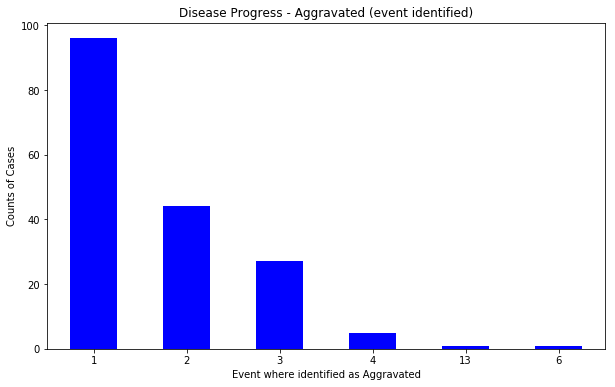

In [110]:
fig, ax = plt.subplots()

#all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'})\
all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id').agg({'event_number':'max'})['event_number'].value_counts()\
.plot(kind='bar',
     ax = ax,
     legend=False,
     rot=0, 
     title = 'Disease Progress - Aggravated (event identified)',
     figsize=(10, 6),
     color='b')

ax.set_ylabel('Counts of Cases')
ax.set_xlabel('Event where identified as Aggravated')
vals = ax.get_yticks()

In [117]:
sub_aggr = all_aggr.loc[all_aggr.how_disease_progressing=='aggravated'].groupby('case_id', as_index=False).agg({'event_number':'max'})

In [118]:
sub_aggr[sub_aggr['event_number']==4]

,case_id,event_number
23,3107EB54-BBB2-E8D7-B6EF-FA1225B06025,4
63,692A1A57-6ACB-C8DF-ABDC-EDDBC6CC223C,4
151,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,4
158,E90E89C8-A192-6889-AFAD-264AA3C53D76,4
172,FF5AA0F3-3DE8-F906-9425-BA0BB36B5072,4


In [122]:
# set of cases where aggravated is seen in 4th event and capture the progress prior to 'aggravated'
set1 = all_aggr.loc[all_aggr.case_id.isin(sub_aggr[sub_aggr['event_number']==4].case_id)]

In [136]:
set1[set1['event_number'] <= 4].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

how_disease_progressing,aggravated,cured,improved
case_id,,,
3107EB54-BBB2-E8D7-B6EF-FA1225B06025,1,1,0
692A1A57-6ACB-C8DF-ABDC-EDDBC6CC223C,1,0,2
DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,1,3,0
E90E89C8-A192-6889-AFAD-264AA3C53D76,1,2,1
FF5AA0F3-3DE8-F906-9425-BA0BB36B5072,1,2,1


In [137]:
# set of cases where aggravated is seen in 3rd event and capture the progress prior to 'aggravated'
set2 = all_aggr.loc[all_aggr.case_id.isin(sub_aggr[sub_aggr['event_number']==3].case_id)]
set2[set2['event_number'] <= 3]

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
6862,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,treatment,1,D8B2C83D-CA1F-55C0-8CEF-4A47F5D2CBF1,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-14 18:04:02+00,improved,no,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,1.0,ari,NaN
6863,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,treatment,2,DA304E98-63B0-FFE7-AB1F-AC612F5181D0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-15 17:01:38+00,improved,no,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,2.0,ari,NaN
6864,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,treatment,3,A5D07833-9AD6-9301-96AB-A17371EDC3C0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-16 20:23:07+00,aggravated,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,3.0,referral,NaN
8654,20688B2A-AAB8-456A-8AE5-0F72E3441AB0,referral,1,4DB338FB-1DC9-140E-BC24-C9E716408314,75feff31-d569-469d-a626-4e8d5fc028c9,f2ac7f9c-b659-4fbf-baf8-6d727c9fc340,ba411dce-41e1-4fdb-ae85-238205d647e7,2017-03-29 09:28:15.4+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
8655,20688B2A-AAB8-456A-8AE5-0F72E3441AB0,referral,2,F71D64F0-37B0-30A6-B572-454D4BD74E6F,75feff31-d569-469d-a626-4e8d5fc028c9,f2ac7f9c-b659-4fbf-baf8-6d727c9fc340,ba411dce-41e1-4fdb-ae85-238205d647e7,2017-03-31 04:20:25.914+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
8656,20688B2A-AAB8-456A-8AE5-0F72E3441AB0,referral,3,87D25A7C-A4C5-254A-AA1C-0E56C45DB8D4,75feff31-d569-469d-a626-4e8d5fc028c9,f2ac7f9c-b659-4fbf-baf8-6d727c9fc340,ba411dce-41e1-4fdb-ae85-238205d647e7,2017-03-31 21:45:16.419+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
16489,3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,referral,1,EF966AB2-52C0-E1FB-BD55-62CC62AA7430,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,554B0D77-841E-E8A8-AD47-7BC1FE2B7634,2017-07-06 11:12:56.418+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
16490,3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,referral,2,2D2199B5-67E3-6327-A159-385519662B46,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,554B0D77-841E-E8A8-AD47-7BC1FE2B7634,2017-07-07 17:44:27.371+00,improved,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
16491,3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,referral,3,6BD0CEDC-E421-6C3B-8370-99622DC03FA8,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,554B0D77-841E-E8A8-AD47-7BC1FE2B7634,2017-07-08 10:08:33.772+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
16947,408877B0-E32B-0991-9A97-4AD6AB64C8BE,referral,1,683E527C-67FE-821D-9748-8397415FF851,fda753c1c37ef32fba0138a4c7c52c0b,1c6e4915-44b9-4ba0-bf40-12a03488f3d9,FF920A7F-2A75-72C9-9B62-E7C17FD7B873,2017-08-22 09:08:49.593+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


In [138]:
set2[set2['event_number'] <= 3].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

how_disease_progressing,aggravated,cured,improved,no_change
case_id,,,,
19DC94A0-393E-2DE0-BA39-FCAAA2B84094,1,0,2,0
20688B2A-AAB8-456A-8AE5-0F72E3441AB0,1,0,2,0
3EB9D7B3-539E-8D8D-A500-C3F96BC199AC,1,0,2,0
408877B0-E32B-0991-9A97-4AD6AB64C8BE,3,0,0,0
439701EB-6075-6B1A-B033-AB1ED0005026,1,0,1,1
52EA4EF6-2CC8-F628-ABF7-CCDFCC8A592C,1,0,2,0
559808BB-FE2D-25C0-8146-ABE507ABC85B,1,0,0,2
5612E7F4-6E37-ED10-8333-1D7CE21481C7,1,2,0,0
63953F1E-69C7-2BD4-84C3-E4325BC1805B,1,0,2,0


In [151]:
# set of cases where aggravated is seen in 2nd event and capture the progress prior to 'aggravated'
set3 = all_aggr.loc[all_aggr.case_id.isin(sub_aggr[sub_aggr['event_number']==2].case_id)]
set3[set3['event_number'] <= 2].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

how_disease_progressing,aggravated,cured,improved,no_change
case_id,,,,
09DAC086-3230-0AB2-92F4-ED57903FAA38,1,0,1,0
0C2207D8-026E-4E79-B6E7-5D6843030C13,1,1,0,0
108E2394-E83A-BC6D-B733-10450D301939,1,0,1,0
147CBB4F-3F65-8A0D-8A8E-4119283193FD,1,0,1,0
14D8DDEE-B230-E311-90D5-3479C4A408AC,1,0,1,0
183C90BD-0DAC-DAC1-B44D-F667FAEA9553,2,0,0,0
1C2A9564-9BCA-4DC5-ABBE-0BF7C613D2D5,1,0,1,0
1D7D5A6C-185A-6603-85E2-EF44E3FEC280,1,0,1,0
270535B0-1770-85F4-B18C-EE2B7B7BB583,1,0,1,0


In [152]:
set3_events = set3[set3['event_number'] <= 2].groupby('case_id')['how_disease_progressing'].value_counts().unstack().fillna(0).astype(np.integer)

In [186]:
set3_events

how_disease_progressing,case_id,aggravated,cured,improved,no_change
0,09DAC086-3230-0AB2-92F4-ED57903FAA38,1,0,1,0
1,0C2207D8-026E-4E79-B6E7-5D6843030C13,1,1,0,0
2,108E2394-E83A-BC6D-B733-10450D301939,1,0,1,0
3,147CBB4F-3F65-8A0D-8A8E-4119283193FD,1,0,1,0
4,14D8DDEE-B230-E311-90D5-3479C4A408AC,1,0,1,0
5,183C90BD-0DAC-DAC1-B44D-F667FAEA9553,2,0,0,0
6,1C2A9564-9BCA-4DC5-ABBE-0BF7C613D2D5,1,0,1,0
7,1D7D5A6C-185A-6603-85E2-EF44E3FEC280,1,0,1,0
8,270535B0-1770-85F4-B18C-EE2B7B7BB583,1,0,1,0
9,2D0B1DB0-3DC3-A6E2-B206-871080BE6093,1,0,1,0


In [191]:
#set3_events.reset_index('case_id', inplace=True)
set3_events[['cured', 'improved', 'no_change', 'case_id']].groupby(['cured', 'improved', 'no_change']).agg({'case_id':'count'})

case_id
cured improved no_change         
0     0        0                6
               1                6
      1        0               24
1     0        0                8

In [194]:
set3_events[['cured', 'improved', 'no_change', 'case_id']].groupby(['cured', 'improved', 'no_change']).agg({'case_id':'count'})

case_id
cured improved no_change         
0     0        0                6
               1                6
      1        0               24
1     0        0                8

In [32]:
one_followup = followup.groupby(['case_id', 'event_type', 'how_disease_progressing'], as_index=False).agg({'event_number':'count', 'reported':'min'})

In [33]:
one_followup[one_followup['event_number'] == 1]['how_disease_progressing'].value_counts()

improved      12158
cured         11828
no_change       556
aggravated      168
Name: how_disease_progressing, dtype: int64

In [35]:
#tmt[tmt['case_id'] == 'FFE090E5-DEBE-839C-9CB4-BFB48C9D762F']

In [36]:
two_followup = followup.groupby(['case_id', 'event_type', 'how_disease_progressing'], as_index=False).agg({'event_number':'count', 'reported':'min'})
two_followup[one_followup['event_number'] == 2]['how_disease_progressing'].value_counts()

improved      8129
cured         2953
no_change       45
aggravated       5
Name: how_disease_progressing, dtype: int64

In [130]:
followup[followup['case_id'] == 'DE324C10-1535-A4D2-BD49-1DBE7AABBAFC']
         #EB06E202-85A4-1442-94CB-EEE3DAC2958F']

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
58518,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,treatment,1,7804799D-0F5C-CC98-ACB4-99F471863474,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-22 12:32:04+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,referral,NaN
58519,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,2,606DC75A-C1C5-036A-8F6A-6111D279D032,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-23 18:18:52.318+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
58520,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,3,CD9EF73B-3903-8E89-A7D5-E0AC85D48FFA,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-24 19:18:45.817+00,cured,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up
58521,DE324C10-1535-A4D2-BD49-1DBE7AABBAFC,referral,4,36E82F20-4A6E-BEA6-A116-3DF5E95B3F33,4cafc8da-c840-42a7-b2f8-7ecaaf948a00,f675317a-8e0e-4b51-99df-f30e152f8c82,304BEA3D-3672-5F8B-98ED-C591309279DE,2017-11-25 18:18:51.62+00,aggravated,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,follow_up


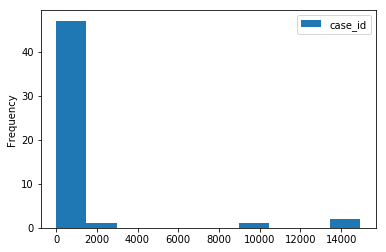

In [64]:
fig, ax = plt.subplots()

followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count()\
.plot(kind='hist',
     ax = ax,
     legend=True)

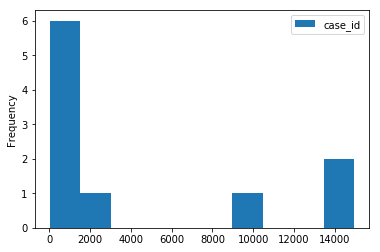

In [66]:
fig, ax = plt.subplots()

followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count().head(10)\
.plot(kind='hist',
     ax = ax,
     legend=True)

In [67]:
followup[followup['event_type']=='referral'].groupby('event_number')['case_id'].count().head(10)

event_number
1     14325
2     14942
3      9563
4      2375
5       279
6       148
7        87
8        58
9        40
10       31
Name: case_id, dtype: int64

In [53]:
followup[followup['event_number']==51]

,case_id,event_type,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,how_disease_progressing,new_danger_sign,...,tfu_act_not_given,tfu_child_taking_amox,tfu_amox_not_given,tfu_child_taking_zinc,tfu_zinc_not_given,tfu_child_taking_ors,tfu_ors_not_given,tfu_follow_up_count,tfu_follow_up_type,rfu_task_to_perform
46102,B00607B6-E726-0651-8169-6EFBE514A943,referral,51,BED099BD-7534-F6F8-BEBB-56E212B82F87,c92915b9-fc75-4c4c-909f-3286c2101428,f1f1a37f-14f1-418c-b064-2a53e643218f,b67cd1d8-2965-4901-9d30-b7715b8827c6,2017-07-21 11:45:01.375+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,close_out


In [20]:
# number of patients with malaria, diarrhea or ari
len(tmt[(tmt['treat_for_malaria'] == True) | (tmt['treat_for_diarrhea'] == True) | (tmt['treat_for_ari'] == True)])

23561

In [21]:
tmt.groupby('how_disease_progressing').count()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,zinc_not_given,child_taking_ors,ors_not_given,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
how_disease_progressing,,,,,,,,,,,,,,,,,,,,,
aggravated,85,85,85,85,85,85,85,85,85,85,...,0,1,0,0,85,0,0,0,85,85
cured,7730,7730,7730,7730,7730,7730,7730,7730,7730,7730,...,1,60,2,7730,7730,0,0,0,7730,7730
improved,14898,14898,14898,14898,14898,14898,14898,14898,14898,14898,...,1,62,2,14898,14898,0,0,0,14898,14898
no_change,206,206,206,206,206,206,206,206,206,206,...,1,6,1,63,206,0,0,0,206,206


In [22]:
tmt = tmt[tmt['close_out']==False]
tmt.groupby('how_disease_progressing').count()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,zinc_not_given,child_taking_ors,ors_not_given,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
how_disease_progressing,,,,,,,,,,,,,,,,,,,,,
aggravated,46,46,46,46,46,46,46,46,46,46,...,0,0,0,0,46,0,0,0,46,46
cured,7458,7458,7458,7458,7458,7458,7458,7458,7458,7458,...,0,49,2,7458,7458,0,0,0,7458,7458
improved,14423,14423,14423,14423,14423,14423,14423,14423,14423,14423,...,1,56,2,14423,14423,0,0,0,14423,14423
no_change,131,131,131,131,131,131,131,131,131,131,...,1,2,1,58,131,0,0,0,131,131


In [23]:
tmt.head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
0,00159146-3099-3ECF-9218-DAF176D00A12,1,2D09AC5E-6A1D-02C9-844A-7A3CCC59B236,db91e797f2ce030419456e90ab7914d5,8bc01540-57c3-4cea-9b7d-c4922098a59c,356559E4-BA74-411C-BFF4-AC4DF047AEBF,2017-09-16 19:10:38+00,follow_up,False,False,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,4,ari
1,001F9F88-1793-3401-84D8-E34D25A43002,1,86D3B6D7-3584-0929-9930-263185102CE3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-01 09:47:26+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,1,malaria
2,001F9F88-1793-3401-84D8-E34D25A43002,2,D781E302-EBCC-83F5-AE76-C91E6CD7E9FF,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-02 13:57:10+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,2,malaria
3,001F9F88-1793-3401-84D8-E34D25A43002,3,9EA28B2C-9776-AC04-A77C-A9CD8DC504A3,e4fe5803-e31a-4304-ab1f-e66b653d5ed0,59b20b90-3fdd-4c12-8fe4-8fcbe15389b9,5afdce0e-1937-4b46-bbd5-89f861752dab,2017-06-03 10:39:17+00,follow_up,False,True,...,NaN,NaN,improved,no,False,NaN,NaN,NaN,3,malaria
4,00249697-479E-93E4-AFFE-47F095816F20,1,E40A5130-2FAB-508C-B6A0-7BD4DA08321B,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,97410838-dc38-4fde-a48c-57d901dcfdca,2017-03-04 13:47:21+00,follow_up,False,True,...,NaN,NaN,cured,no,False,NaN,NaN,NaN,2,malaria


In [24]:
tmt[tmt['how_disease_progressing'] == 'aggravated'].groupby('patient_id').head()

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
546,05D06A0A-FDE0-51F1-BDAA-38E5E1A29175,1,249B733C-7B7D-C690-9FB7-0AE2B57E3584,a742fff1-7ba4-43bb-9ab1-ec602781f6c9,9bd0afe1-19aa-4431-92f2-05e70d4c8e2f,a36b00d3-eef5-4658-91be-2ab62ca773f0,2017-04-04 19:55:44+00,follow_up,True,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
1904,147CBB4F-3F65-8A0D-8A8E-4119283193FD,2,E304B0A2-1D89-F170-8A08-A659169A9F98,840b2728-463b-4ff0-983e-f0d24af1d87e,958c8ea7-4d9f-454b-ae91-060829f56b61,0ccaf458-bb6b-40c6-bc7c-0129ead94fe9,2017-02-08 10:03:03+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
2266,183C90BD-0DAC-DAC1-B44D-F667FAEA9553,1,FD7674E1-677C-2B73-A3E7-2E054E65E05C,a4119d4c-664e-49cf-a596-aa25981ebf8d,a7cc7776-9da8-4ea6-8a8d-3c23aa6c9055,d9775082-d5fa-4f70-9c69-58f5b32c24b3,2017-04-05 16:27:33+00,follow_up,False,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
2434,19DC94A0-393E-2DE0-BA39-FCAAA2B84094,3,A5D07833-9AD6-9301-96AB-A17371EDC3C0,3f0fce86e571a1275c338749fb1c6688,623f0465-9eb9-41a2-adac-fd9d0337cf16,401CC651-7594-3260-BB64-709258281769,2017-12-16 20:23:07+00,follow_up,False,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,3,referral
3406,23A66395-D099-B16C-B191-D387F1B65FAA,1,20756DA6-E79F-9C3B-A0B1-4EA59F6468D1,0b39d72a-1750-436b-a00c-26671869a6ee,a4368a6b-18b8-472b-8866-0b0db5a2a0a2,a581121e-018f-4797-9c53-9eb1adbcf93c,2017-03-19 10:08:25+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
3855,298AF4D9-B6C0-7FA8-B89B-968CB857AA93,1,EED15A5F-1D8C-753E-929F-429801B3EB59,320b52f8-7bd3-46af-a3e4-24c040be4612,dac29b40-cb6e-4231-849d-2590e81c6c4b,0fa7917b-867b-4e71-aea8-e2e61fa94f0a,2017-03-12 12:01:08+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
4661,3252B126-0A4F-78A5-BCEF-A65D236D601C,2,6EC35CCA-A58E-51BE-ABA9-33915D800C12,26ef4c63-e601-4678-8d2d-ffd890d3f72e,275caf3f-5486-4688-ad3d-944e856c87ae,950ea4dc-21a8-46cc-9f75-b82daacc2869,2017-03-04 14:39:00+00,follow_up,False,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,2,referral
4697,32CE48B9-69F3-E90D-B4FC-C7C55359A932,1,943EF64A-A4AC-3F8F-A115-984F9F72771E,654c6596-7237-4f3c-a1ce-af3f46adb935,25e31603-9243-4e99-8312-356f19235d9d,9976b3ad-8e3e-4cdd-ada6-e52957ed4905,2017-06-13 09:16:27+00,follow_up,True,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
5453,3B7B3F62-B4DF-2A27-B398-9D22B456E053,1,A7675647-A21D-FABC-8F87-C2809CC3E07A,6dfa794a-542f-4162-b052-81264db24837,8bc36cc0-d08e-4451-93c4-df3c04df746a,a1daeef6-0cd7-4c4e-b6bc-1bd44dc4c204,2017-03-07 09:17:37+00,follow_up,True,False,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral
5770,3F0671E0-559A-4F69-BA76-7F4935E835DE,1,BA0D8BAD-C0D2-9B6C-BA89-5209C92C4539,320b52f8-7bd3-46af-a3e4-24c040be4612,dac29b40-cb6e-4231-849d-2590e81c6c4b,ac617ebb-00d1-48cb-a3ec-f61c4b35cd40,2017-03-13 17:04:08+00,follow_up,True,True,...,NaN,NaN,aggravated,NaN,False,NaN,NaN,NaN,1,referral


In [25]:
# Distribution of cases per patient.
# List of patients with cases whose reporting date are within a month of one another.
pt_case_dist = tmt.groupby('patient_id').count()
pt_case_dist

,case_id,event_number,event_id,chw_id,chw_parent_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,treat_for_ari,...,child_taking_ors,ors_not_given,how_disease_progressing,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type
patient_id,,,,,,,,,,,,,,,,,,,,,
0017213b-948d-4412-a045-dd0f96ca597a,5,5,5,5,5,5,5,5,5,5,...,0,0,5,5,5,0,0,0,5,5
00191d38-092f-4535-8645-e945fdbba710,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
002474b9-b444-481a-beed-eeba61a17cc9,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,4,4,4,4,4,4,4,4,4,4,...,0,0,4,4,4,0,0,0,4,4
003BA405-4DDC-1187-86AE-5AF6A9D4E838,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,0,0,0,2,2
004A8C5C-7FF0-8001-9660-C44FC09EE1B1,4,4,4,4,4,4,4,4,4,4,...,0,0,4,4,4,0,0,0,4,4
00694a4d-52ae-488a-bbf8-016173ffbd4a,8,8,8,8,8,8,8,8,8,8,...,0,0,8,8,8,0,0,0,8,8
006d300a-ed53-4ebc-b1c0-9180f356edd2,3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,0,0,0,3,3
007112cb-6ec1-4e69-9a12-50b1e9482cee,7,7,7,7,7,7,7,7,7,7,...,0,0,7,7,7,0,0,0,7,7


<module 'matplotlib.pyplot' from 'C:\\Users\\sudha\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1080x720 with 0 Axes>

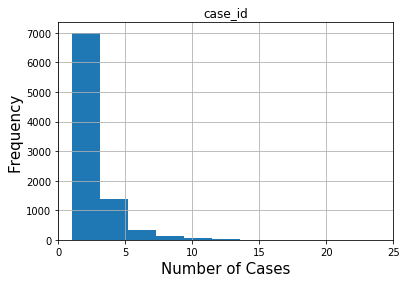

In [26]:
%matplotlib inline  
fig = plt.figure(figsize=(15,10))
pt_case_dist.hist(column="case_id")
plt.xlabel("Number of Cases", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim([0.0,25.0])
plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001736C974358>]],
      dtype=object)

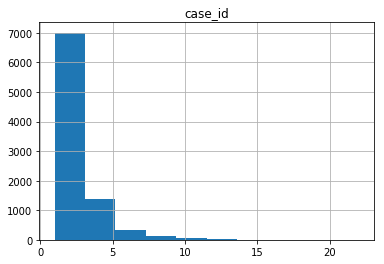

In [27]:
pt_case_dist.hist(column = "case_id")

In [28]:
(pt_case_dist['event_id'] <= 5).sum()

8381

In [29]:
pt_case_dist['event_id'].sum()

22058

In [30]:
tmt.groupby(['patient_id'])['reported'].count()
tmt['date_reported'] = pd.to_datetime(tmt['reported'], infer_datetime_format = True)

In [31]:
tmt['month'] = tmt['date_reported'].dt.month
def get_disease(row):
    if row['treat_for_malaria'] == True:
        return 'Malaria'
    if row['treat_for_diarrhea'] == True:
        return 'Diarrhea'
    if row['treat_for_ari'] == True:
        return 'ari'
    else:
        return 'None'
    

tmt['disease'] = tmt.apply(lambda row: get_disease(row), axis=1)
#tmt['month']

In [32]:
tmt_in_month = tmt.groupby(['month', 'patient_id', 'follow_up_type'])['date_reported'].count() 

In [33]:
tmt[tmt['patient_id'] == '0da916df-49b9-43b8-a65b-f323a58ea164']

,case_id,event_number,event_id,chw_id,chw_parent_id,patient_id,reported,task_to_perform,treat_for_diarrhea,treat_for_malaria,...,new_danger_sign,close_out,why_close_out,when_child_died,where_child_died,follow_up_count,follow_up_type,date_reported,month,disease
14764,A1810BAF-7465-2F53-965F-9A1B3A2AF756,1,1B19E01F-CB6E-1B34-B5A4-443D0871F34A,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-03-17 11:54:06+00,follow_up,False,True,...,no,False,NaN,NaN,NaN,1,malaria,2017-03-17 11:54:06,3,Malaria
14765,A1810BAF-7465-2F53-965F-9A1B3A2AF756,2,5620F971-B311-53F7-A8BA-FB235B1CB0B0,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-03-20 10:07:22+00,follow_up,False,True,...,yes,False,NaN,NaN,NaN,2,referral,2017-03-20 10:07:22,3,Malaria
20206,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,1,90A3162F-308B-8D1B-BB54-7B9E509FBBF1,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-14 12:19:32+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,1,ari,2017-12-14 12:19:32,12,ari
20207,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,2,BE686B5F-8962-2565-A7B3-B562734403C7,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-15 13:06:52+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,2,ari,2017-12-15 13:06:52,12,ari
20208,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,3,4973783F-9664-74B1-8466-8EADB5C2ADCA,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-16 15:04:32+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,3,ari,2017-12-16 15:04:32,12,ari
20209,DB83ACB5-A481-4866-AC52-F5EB4C48AAE1,4,444DEDAE-E947-8E92-BA96-D620B6C591B1,4f2fa18f-9f9f-4c91-b08a-17a9911c2221,fdeaf5d5-9518-4511-9f14-007afe72f0d1,0da916df-49b9-43b8-a65b-f323a58ea164,2017-12-18 12:29:53+00,follow_up,False,False,...,no,False,NaN,NaN,NaN,4,ari,2017-12-18 12:29:53,12,ari


In [34]:
tmt_in_month.head()

month  patient_id                            follow_up_type
1      002474b9-b444-481a-beed-eeba61a17cc9  ari               1
       00694a4d-52ae-488a-bbf8-016173ffbd4a  referral          1
       007112cb-6ec1-4e69-9a12-50b1e9482cee  ari               3
       0071C1B3-16C0-864C-A9B5-F0B48CE3666D  ari               3
       0086AEBD-27AE-EFFE-BEAD-A62ADE96416A  ari               2
Name: date_reported, dtype: int64

In [35]:
tmt_in_month.to_csv('treatment_in_month_timeframe.csv')

In [36]:
tmt.groupby(['month', 'disease']).agg(("event_id"))

In [37]:
grouped = tmt.groupby(['patient_id', 'disease']).agg({"date_reported": [min, max]})

In [38]:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
#grouped.sort_values(by=['patient_id'])
grouped.head()

,,date_reported_min,date_reported_max
patient_id,disease,,
0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03
00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54
002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37
003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32
003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23


In [39]:
def first_second(df):
    return df.ix[[0, -1]]

#grouped2 = tmt.groupby(['patient_id', 'disease']).agg({"date_reported": [min, max, 'first', 'last']})
grouped2 = tmt.groupby(['patient_id', 'disease'], as_index=False).agg({"date_reported": [min, max, 'first', 'last']})

#grouped2 = tmt.groupby(['patient_id']).apply(first_second(tmt))
grouped2.head()

patient_id  disease       date_reported  \
                                                                 min   
0  0017213b-948d-4412-a045-dd0f96ca597a  Malaria 2017-03-04 20:07:07   
1  00191d38-092f-4535-8645-e945fdbba710      ari 2017-03-03 18:59:54   
2  002474b9-b444-481a-beed-eeba61a17cc9      ari 2018-01-24 09:59:37   
3  003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb      ari 2017-04-23 20:35:48   
4  003BA405-4DDC-1187-86AE-5AF6A9D4E838      ari 2017-10-30 16:42:42   

                                                               
                  max               first                last  
0 2017-03-29 12:26:03 2017-03-04 20:07:07 2017-03-29 12:26:03  
1 2017-03-03 18:59:54 2017-03-03 18:59:54 2017-03-03 18:59:54  
2 2018-01-24 09:59:37 2018-01-24 09:59:37 2018-01-24 09:59:37  
3 2017-04-27 17:44:32 2017-04-23 20:35:48 2017-04-27 17:44:32  
4 2017-11-02 07:47:23 2017-10-30 16:42:42 2017-11-02 07:47:23

In [40]:
grouped2.columns.values

array([('patient_id', ''), ('disease', ''), ('date_reported', 'min'),
       ('date_reported', 'max'), ('date_reported', 'first'),
       ('date_reported', 'last')], dtype=object)

In [41]:
grouped2.columns = ["_".join(x) for x in grouped2.columns.ravel()]
grouped2.rename(columns={'patient_id_' : 'patient_id', 'disease_' : 'disease'}, inplace=True)
grouped2.sort_values(['patient_id', 'disease'], ascending=[True, True])
new = grouped2.head(20)

In [42]:
list(new.columns.values)

['patient_id',
 'disease',
 'date_reported_min',
 'date_reported_max',
 'date_reported_first',
 'date_reported_last']

In [43]:
new

,patient_id,disease,date_reported_min,date_reported_max,date_reported_first,date_reported_last
0,0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03,2017-03-04 20:07:07,2017-03-29 12:26:03
1,00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54
2,002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37
3,003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32,2017-04-23 20:35:48,2017-04-27 17:44:32
4,003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23,2017-10-30 16:42:42,2017-11-02 07:47:23
5,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,Diarrhea,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54
6,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,ari,2017-04-17 00:48:32,2017-04-20 09:55:19,2017-04-17 00:48:32,2017-04-20 09:55:19
7,00694a4d-52ae-488a-bbf8-016173ffbd4a,Diarrhea,2017-05-16 10:55:18,2018-01-13 12:17:17,2017-05-16 10:55:18,2017-12-13 19:21:37
8,00694a4d-52ae-488a-bbf8-016173ffbd4a,ari,2017-03-09 08:30:02,2017-07-16 14:28:56,2017-03-09 08:30:02,2017-07-16 14:28:56
9,006d300a-ed53-4ebc-b1c0-9180f356edd2,Diarrhea,2017-07-10 10:56:28,2018-02-06 16:03:36,2018-02-06 16:03:36,2017-07-10 10:56:28


In [44]:
grouped2['num_days'] = abs((grouped2.date_reported_last - grouped2.date_reported_first).dt.days)


In [45]:
grouped2.head(20)

,patient_id,disease,date_reported_min,date_reported_max,date_reported_first,date_reported_last,num_days
0,0017213b-948d-4412-a045-dd0f96ca597a,Malaria,2017-03-04 20:07:07,2017-03-29 12:26:03,2017-03-04 20:07:07,2017-03-29 12:26:03,24
1,00191d38-092f-4535-8645-e945fdbba710,ari,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,2017-03-03 18:59:54,0
2,002474b9-b444-481a-beed-eeba61a17cc9,ari,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,2018-01-24 09:59:37,0
3,003121a6-dd2b-40bc-a0a8-4ae3ac6d61cb,ari,2017-04-23 20:35:48,2017-04-27 17:44:32,2017-04-23 20:35:48,2017-04-27 17:44:32,3
4,003BA405-4DDC-1187-86AE-5AF6A9D4E838,ari,2017-10-30 16:42:42,2017-11-02 07:47:23,2017-10-30 16:42:42,2017-11-02 07:47:23,2
5,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,Diarrhea,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,2017-11-23 19:26:54,0
6,004A8C5C-7FF0-8001-9660-C44FC09EE1B1,ari,2017-04-17 00:48:32,2017-04-20 09:55:19,2017-04-17 00:48:32,2017-04-20 09:55:19,3
7,00694a4d-52ae-488a-bbf8-016173ffbd4a,Diarrhea,2017-05-16 10:55:18,2018-01-13 12:17:17,2017-05-16 10:55:18,2017-12-13 19:21:37,211
8,00694a4d-52ae-488a-bbf8-016173ffbd4a,ari,2017-03-09 08:30:02,2017-07-16 14:28:56,2017-03-09 08:30:02,2017-07-16 14:28:56,129
9,006d300a-ed53-4ebc-b1c0-9180f356edd2,Diarrhea,2017-07-10 10:56:28,2018-02-06 16:03:36,2018-02-06 16:03:36,2017-07-10 10:56:28,212


In [46]:
#grouped2.to_csv('Patient_Multiple_Cases_Span.csv')

In [37]:
grouped2.to_excel('Datasets/Patient_Multiple_Cases_Span.xlsx')